# Skills Ladder Process Data

Skills Ladder is an IT training company based in Gloucestershire, United Kingdom. This notebook aims to process data on the demographic make-up of past trainees for analysis. This is done by...

## Read-in data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/HUAWEI/Desktop/Projects/Skills-Ladder-Data-Analyis/learner_data.csv')

## Overview data

In [2]:
# gets an overview of the quantity of data
print('\n' + 'Columns --- ' + str(len(df.columns)))
print('Rows --- ' + str(len(df)) + '\n')
print('\033[1m' + 'Column names:' + '\033[0m' + '\n')

# prints the column names
for i in range(len(df.columns)):
    print(df.columns[i].title())


Columns --- 15
Rows --- 1342

Column names:

Date
Bday
Ethnicity
Sex
Hoursworked
Health2
Health1
Hhs
Benefit-Course
Job-Role
Job-Involve
Aspirations
Prevent
Overcome
Qualification


In [3]:
# checks for NAs
print('\n' + '\033[1m' + 'NA counts:' + '\033[0m')
df.isna().sum()


NA counts:


date                 0
bday                 0
ethnicity            0
sex                  0
hoursworked          4
health2           1143
health1           1078
hhs                  0
benefit-course       0
job-role             0
job-involve          0
aspirations          0
prevent              0
overcome             0
qualification        0
dtype: int64

## Dates

In [4]:
# reassigns the date labels for numerical ordering during plotting and creates a simplified label for vizualization
df = df.assign(numerical_date = df['date'].apply(lambda x: x.split('/')[2] + x.split('/')[1]))
df = df.assign(date_label = df['date'].apply(lambda x: x.split('/')[1] + '/' + x.split('/')[2][2:4]))

# prints examples of the new formats
print('\n' + 'numerical_date --- ' + df.loc[0,'numerical_date'])
print('date_label --- ' + df.loc[0,'date_label'] + '\n')


numerical_date --- 202006
date_label --- 06/20



In [5]:
# identifies a data formatting error in the bday column
lengths = df['bday'].apply(lambda x: len(x.split('/')))
print('\n' + df[lengths!=3].bday.item() + '\n')


1669-09-21



In [6]:
# reassigns the problematic value to something that can be processed
df.loc[lengths!=3,'bday'] = '21/09/1969'

# reassigns the bday labels for numerical ordering during plotting and creates a simplified label for vizualization
df = df.assign(numerical_bday = df['bday'].apply(lambda x: x.split('/')[2] + x.split('/')[1]))
df = df.assign(bday_label = df['bday'].apply(lambda x: x.split('/')[1] + '/' + x.split('/')[2][2:4]))

# prints examples of the new formats
print('\n' + 'numerical_date --- ' + df.loc[0,'numerical_bday'])
print('date_label --- ' + df.loc[0,'bday_label']+ '\n')


numerical_date --- 200108
date_label --- 08/01



In [7]:
# creates an age column based on today's date
from datetime import date

now_year = date.today().strftime('%d/%m/%Y').split('/')[2]
then_year = df['date'].apply(lambda x: x.split('/')[2])
bday_year = df['bday'].apply(lambda x: x.split('/')[2])

# creates a list fo age now and then
age_now = []
age_then = []
for i in range(len(bday_year)):
    age_now.append(int(now_year) - int(bday_year[i]))
    age_then.append(int(then_year[i]) - int(bday_year[i]))
    
df = df.assign(age_now = age_now)
df = df.assign(age_then = age_then)

# prints examples showing the differences
print('\n' + 'Age now = ' + str(df['age_now'][0]))
print('Age then = ' + str(df['age_then'][0]) + '\n')


Age now = 22
Age then = 19



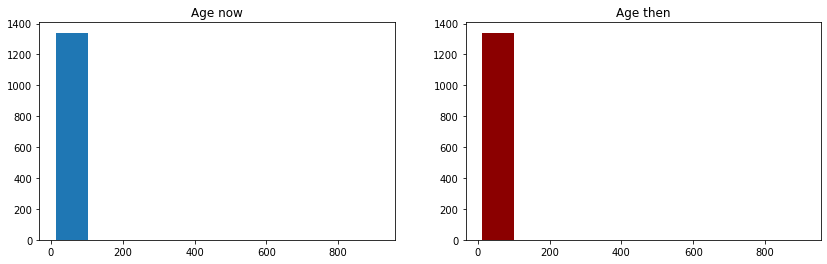

In [8]:
import matplotlib.pyplot as plt

#checks for outlier values
fig, ax = plt.subplots(1, 2, figsize=(14,4))

ax[0].hist(df['age_now']);
ax[0].title.set_text('Age now')
ax[1].hist(df['age_then'], color='darkred');
ax[1].title.set_text('Age then')

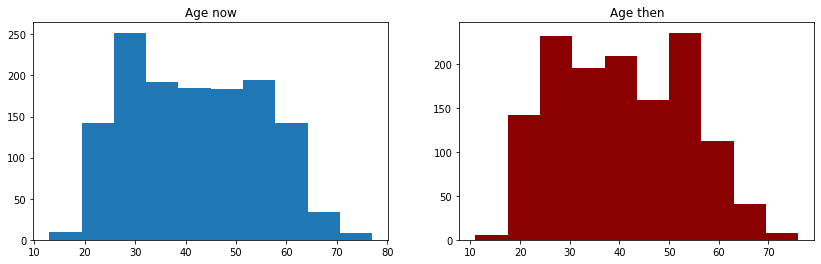

In [9]:
# reassigns the mislabelled age to the median of the respective age columns
df.loc[df.age_now>100, 'age_now'] = np.median(df['age_now'])
df.loc[df.age_then>100, 'age_then'] = np.median(df['age_then'])

#checks again for outlier values
fig, ax = plt.subplots(1, 2, figsize=(14,4))

ax[0].hist(df['age_now']);
ax[0].title.set_text('Age now')
ax[1].hist(df['age_then'], color='darkred');
ax[1].title.set_text('Age then')

## Save Data

In [10]:
df.to_csv('C:/Users/HUAWEI/Desktop/Projects/Skills-Ladder-Data-Analyis/processed_learner_data.csv', index=False)